In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
#Membaca file CSV yang berlokasi di "C:/Users/ASUS/Downloads/Heart_Disease_Prediction.csv"
#dan menyimpannya dalam variabel data
data = pd.read_csv("C:/Users/ASUS/Downloads/Heart_Disease_Prediction.csv")
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
print(data.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [5]:
# Memfilter baris dengan missing values: menjelaskan proses penghapusan secara lebih detail jika ada missing values

NameError: name 'df' is not defined

In [6]:
# Memfilter baris dengan missing values: menjelaskan proses penghapusan secara lebih detail jika ada missing values
# Menunjukkan bahwa missing values dihapus untuk meningkatkan kualitas data
data.dropna(inplace=True)

In [7]:
# Membuat variabel fitur (X) dengan menghapus kolom "Heart Disease" dari dataframe "data"
# "axis=1" menunjukkan bahwa penghapusan dilakukan pada kolom
# Membuat variabel target (y) dengan mengambil kolom "Heart Disease" dari dataframe "data"
X = data.drop("Heart Disease", axis=1)
y = data["Heart Disease"]

In [8]:
# Mengimpor fungsi train_test_split dari library sklearn untuk membagi data menjadi set pelatihan dan set pengujian
# Membagi data menjadi set pelatihan dan set pengujian
# 'X' dan 'y' masing-masing dibagi menjadi 'X_train', 'X_test', 'y_train', dan 'y_test'
# 'test_size=0.2' berarti 20% dari data akan digunakan sebagai set pengujian
# 'random_state=42' digunakan untuk memastikan hasil pembagian data yang konsisten dan dapat direproduksi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

In [10]:
# Melatih model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

In [12]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6851851851851852
Classification Report:
              precision    recall  f1-score   support

     Absence       0.79      0.67      0.72        33
    Presence       0.58      0.71      0.64        21

    accuracy                           0.69        54
   macro avg       0.68      0.69      0.68        54
weighted avg       0.70      0.69      0.69        54

Confusion Matrix:
[[22 11]
 [ 6 15]]


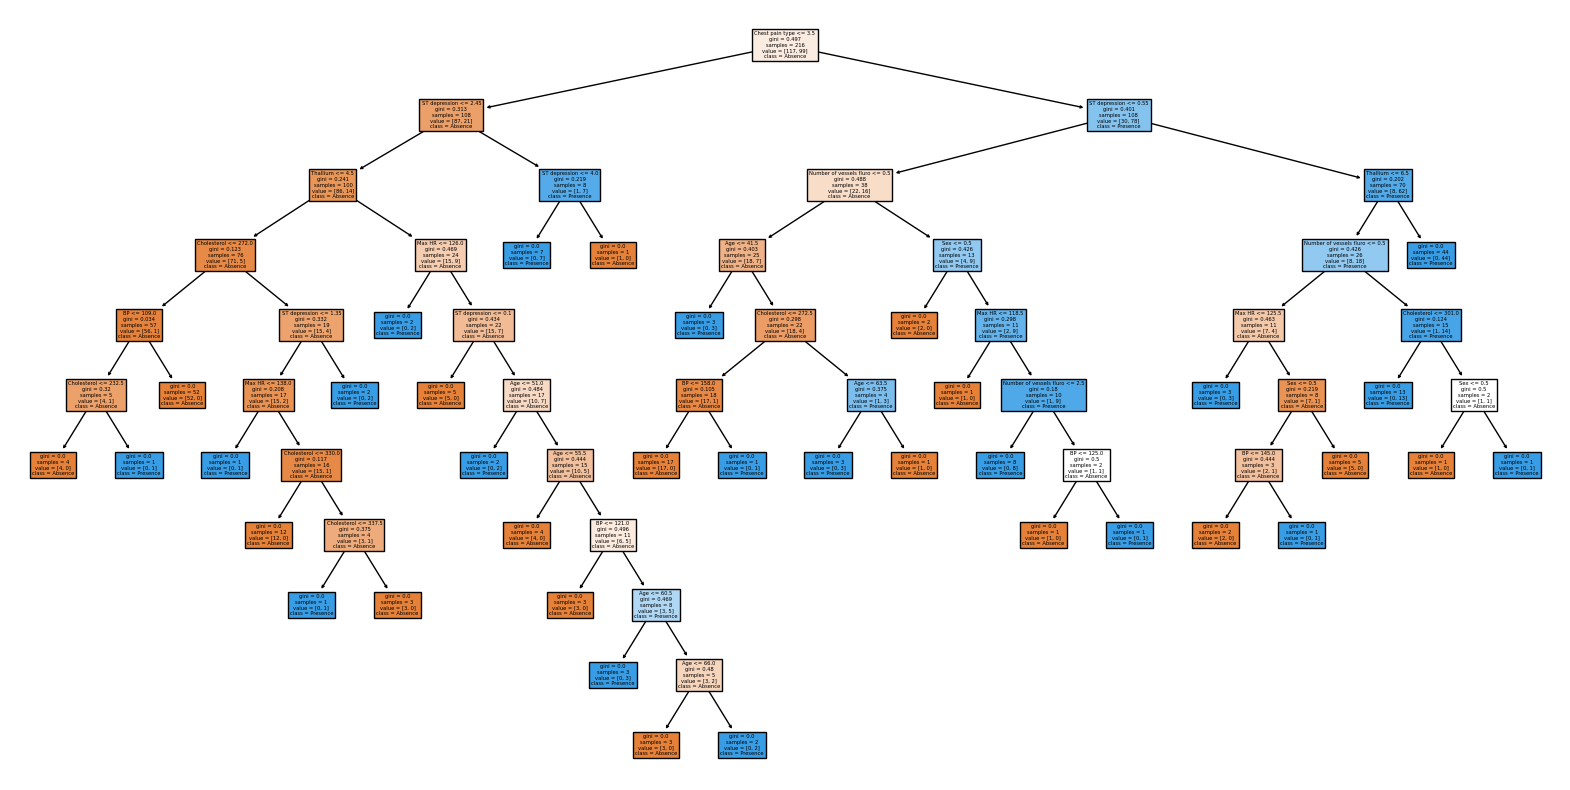

In [13]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()